In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
import pandas as pd

In [7]:
#Original drug
X_o = np.array([[0, 10.77272727, 2117.772727], [4501.363636, 5820.454545, 6514.545455], [6695.909091, 6641.363636, 6570.909091], 
               [6548.181818, 5909.090909, 4363.636364], [3400.454545, 2629.090909, 1940.454545], [1605.454545, 437.5909091, 345.1818182]])

In [8]:
#Generic drug
X_g = np.array([[0, 35.09090909, 1854.304545], [4230, 5615.454545, 6330], [6389.090909, 6827.272727, 6730.909091], 
               [6403.636364, 5905.909091, 4425.909091], [3452.272727, 2659.090909, 2011.363636], [1666.363636, 462.5, 360.1363636]])

In [9]:

# Compute ICA
ica = FastICA(n_components=3)
S_o = ica.fit_transform(X_o)  # Reconstruct signals
A_o = ica.mixing_  # Get estimated mixing matrix

In [10]:

# Compute ICA
ica = FastICA(n_components=3)
S_g = ica.fit_transform(X_g)  # Reconstruct signals
A_g = ica.mixing_  # Get estimated mixing matrix

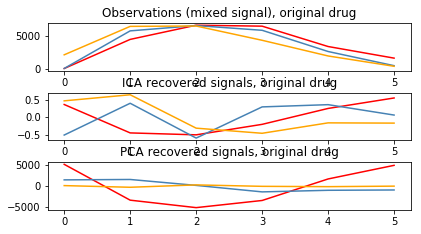

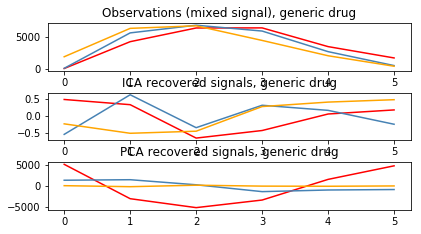

In [18]:
# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H_o = pca.fit_transform(X_o)  # Reconstruct signals based on orthogonal components
H_g = pca.fit_transform(X_g)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X_o, S_o, H_o]
names = ['Observations (mixed signal), original drug',
         'ICA recovered signals, original drug',
         'PCA recovered signals, original drug']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.1, 0.05, 0.94, 0.94, 0.26, 0.46)
plt.show()

models = [X_g, S_g, H_g]
names = [
         'Observations (mixed signal), generic drug',
         'ICA recovered signals, generic drug',
         'PCA recovered signals, generic drug']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.1, 0.05, 0.94, 0.94, 0.26, 0.46)
plt.show()